In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the training and test data
train_data = pd.read_csv('../Data/Data train-test/train.csv', index_col='Date', parse_dates=True)
test_data = pd.read_csv('../Data/Data train-test/train.csv', index_col='Date', parse_dates=True)

# Ensure the index is in the correct datetime format
train_data.index = pd.to_datetime(train_data.index)
test_data.index = pd.to_datetime(test_data.index)



In [2]:
# Create a function to calculate the last value model predictions
def last_value_model(train, test):
    predictions = pd.DataFrame(index=test.index, columns=test.columns)
    last_values = train.iloc[-1]
    for date in test.index:
        predictions.loc[date] = last_values
        last_values = test.loc[date]  # Update last values with actual test values
    return predictions

# Generate predictions
predictions = last_value_model(train_data, test_data)

# Calculate metrics
metrics = {}
for symbol in train_data.columns:
    y_true = test_data[symbol]
    y_pred = predictions[symbol]
    metrics[symbol] = {
        'Mean Absolute Error': mean_absolute_error(y_true, y_pred),
        'Root Mean Squared Error': np.sqrt(mean_squared_error(y_true, y_pred)),
        'Mean Absolute Percentage Error': np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
        'R^2 Score': 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    }

# Convert metrics to a DataFrame for display
metrics_df = pd.DataFrame(metrics).T




Stock Prediction Metrics:


,Mean Absolute Error,Root Mean Squared Error,Mean Absolute Percentage Error,R^2 Score
AAPL,0.462472,1.440367,1.237841,0.982933
META,1.798235,4.477781,1.319798,0.986167
MSFT,0.893418,3.356890,1.187874,0.989018
GOOG,9.926325,26.865174,1.140829,0.986466
AMZN,14.767646,48.586832,1.614978,0.991650
TSLA,1.105549,1.925119,2.060103,0.970579


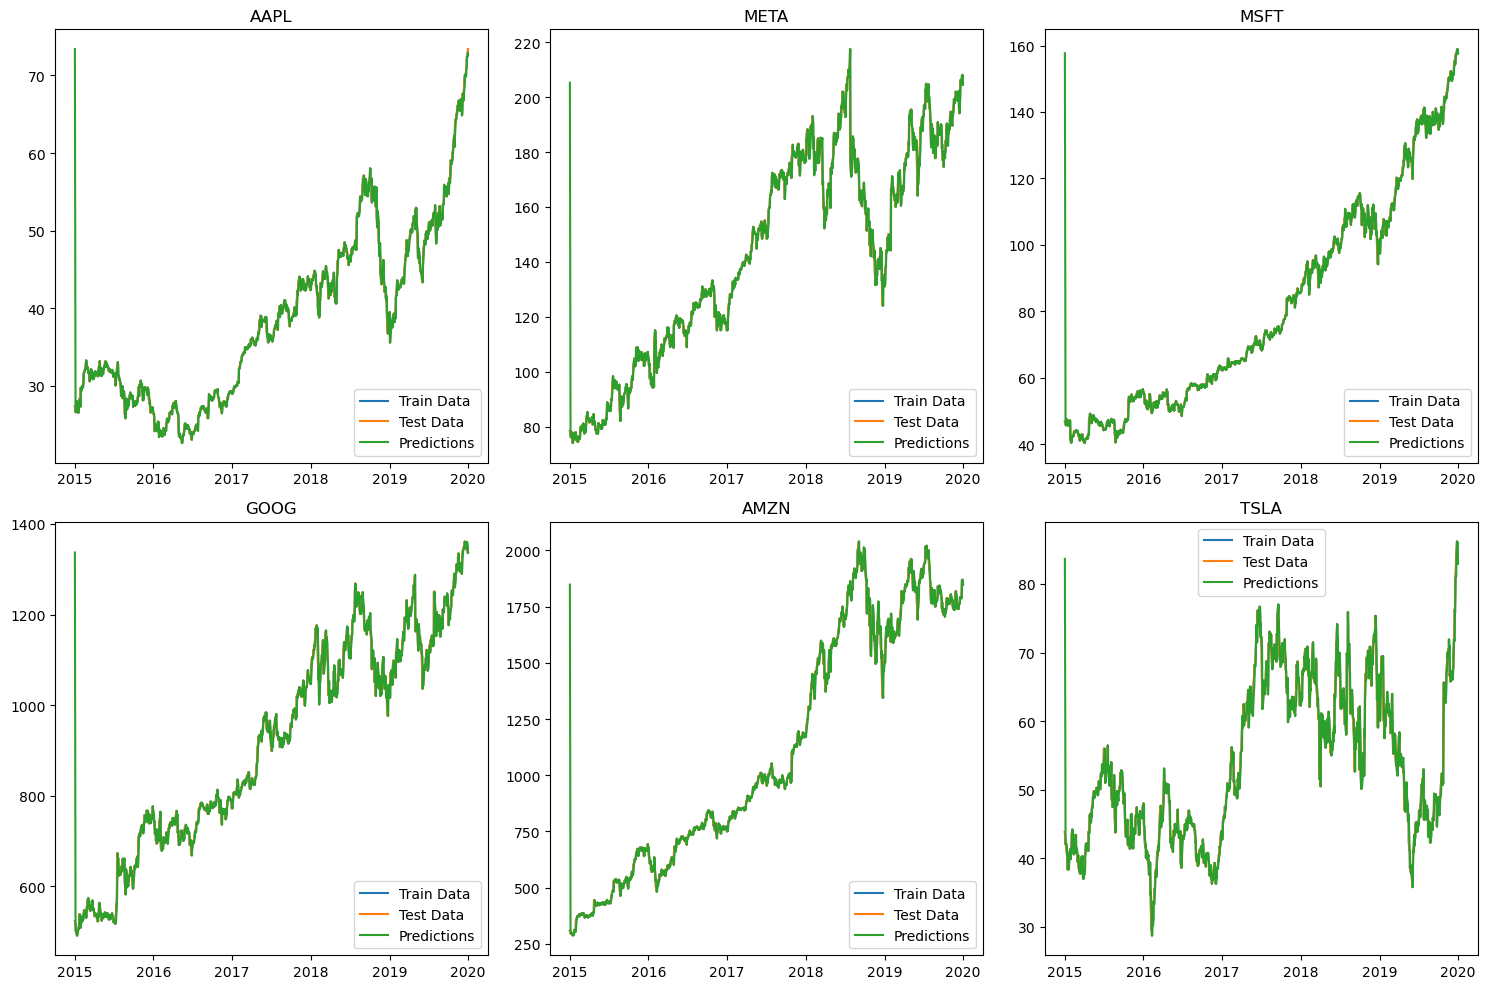

In [3]:
# Display the metrics
print("Stock Prediction Metrics:")
display(metrics_df)

# Plot the results
plt.figure(figsize=(15, 10))
for i, symbol in enumerate(train_data.columns, 1):
    plt.subplot(2, 3, i)
    plt.plot(train_data[symbol], label='Train Data')
    plt.plot(test_data[symbol], label='Test Data')
    plt.plot(predictions[symbol], label='Predictions')
    plt.title(symbol)
    plt.legend()

plt.tight_layout()
plt.show()